<a href="https://colab.research.google.com/github/mondjisola/dpro_divic/blob/master/Clustering_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-means scratch

### K-means scratch model



```python
class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """

        if self.verbose:
            #Output the learning process when #verbose is set to True
            print()
        pass
    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        pass
        return
```



### Artificial dataset for clustering

In [ ]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

### Determine the initial value of the center point



```python
self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
```



### Sum of squared errors (SSE) calculation function



```python
def calc_sse(self,X):
    """
    Calculate the SSE
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features + 1) where the last column is the cluster label
        Features of training data
    """
    sse = 0
    for i in range(len(X)):
        for j in range(self.n_clusters):
            if j == X[i,-1]:
                sse += np.sum((X[i,:-1]-self.myu[j])**2)
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters
```



### Allocation to cluster



```python
def _update_cluster(self,X):
    """
    Assignment of a data point to a cluster
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features + 1) where the last column is the cluster label
        Features of training data
    """
    for i in range(len(X)):
        dists = np.linalg.norm(X[i, :-1] - self.myu, axis=1)
      X[i, -1] = np.argmin(dists)
    #     dist_m = 10**20
    #     for j in range(self.n_clusters):
    #         dist = np.sqrt(np.sum((X[i,:-1]-self.myu[j])**2))
    #         if dist < dist_m:
    #             dist_m = dist
    #             X[i,-1] = j
```



### Movement of the center point



```python
def _update_myu(self,X):
    """
    Moving the center point
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features + 1) where the last column is the cluster label
        Features of training data
    """
    for j in range(self.n_clusters):
        self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)
```



### Repeat and calculate with different initial values



```python
def fit(self, X):
    for i in range(self.n_init):
        self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
        cluster = np.zeros(len(X))
        X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)
        for j in range(self.max_iter):
            old_myu = self.myu
            self.calc_sse(X_cluster)
            self._update_cluster(X_cluster)
            self._update_myu(X_cluster)
            if np.sum(self.myu - old_myu) <= tol:
                break
            if self.verbose:
                print("Initialize：%s　Training times：%s　Best SSE：%s"%(i,j,self.best_sse))
```



### Estimate

In [ ]:
def predict(self, X):
    """
    Function to estimate which cluster the input data belongs to
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
        Features of training data
    Returns
    -------
    y_pred : The following form of ndarray, shape (n_samples,)
        Cluster label of each data point
    """
    y_pred = np.zeros(len(X))
    for i in range(len(X)):
        dist_m = 10**20
        for j in range(self.record_cluster):
            dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
            if dist < dist_m:
                dist_m = dist
                y_pred[i] = j
    return y_pred

### Scratch KMeans

In [ ]:
import numpy as np
class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.best_sse = 10**20

    def calc_sse(self,X):
        """
        Calculate the SSE
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features + 1) where the last column is the cluster label
            Features of training data
        """
        sse = 0
        for i in range(len(X)):
            for j in range(self.n_clusters):
                if j == X[i,-1]:
                    sse += np.sum((X[i,:-1]-self.myu[j])**2)
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters

    def _update_cluster(self,X):
        """
        Assignment of a data point to a cluster
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features + 1) where the last column is the cluster label
            Features of training data
        """
        # for i in range(len(X)):
        #     dist_m = 10**20
        #     for j in range(self.n_clusters):
        #         dist = np.sqrt(np.sum((X[i,:-1]-self.myu[j])**2))
        #         if dist < dist_m:
        #             dist_m = dist
        #             X[i,-1] = j

        for i in range(len(X)):
            dists = np.linalg.norm(X[i, :-1] - self.myu, axis=1)
            X[i, -1] = np.argmin(dists)

    def _update_myu(self,X):
        """
        Moving the center point
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features + 1) where the last column is the cluster label
            Features of training data
        """
        for j in range(self.n_clusters):
                self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        for i in range(self.n_init):
            # Initialize centroids randomly
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)

            for j in range(self.max_iter):
                # old_myu = self.myu
                self.calc_sse(X_cluster)
                self._update_cluster(X_cluster)
                self._update_myu(X_cluster)
                # if np.sum(self.myu - old_myu) <= self.tol:
                #     break
                if self.verbose:
                    print("Initialize：%s　Training times：%s　Best SSE：%s"%(i,j,self.best_sse))

    def predict(self, X):
        """
        Function to estimate which cluster the input data belongs to
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        Returns
        -------
        y_pred : The following form of ndarray, shape (n_samples,)
            Cluster label of each data point
        """
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.record_cluster):
                dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    y_pred[i] = j
        return y_pred

### Execution

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = \
train_test_split(X, train_size=0.8, random_state=None)

In [ ]:
clf = ScratchKMeans(n_clusters=4, n_init=5, max_iter=100, verbose=True)
clf.fit(X_train)

Initialize：0　Training times：0　Best SSE：1010.0984677767798
Initialize：0　Training times：1　Best SSE：247.99203761609525
Initialize：0　Training times：2　Best SSE：168.4047362523706
Initialize：0　Training times：3　Best SSE：75.24100955186792
Initialize：0　Training times：4　Best SSE：38.139454713984
Initialize：0　Training times：5　Best SSE：36.610530567978024
Initialize：0　Training times：6　Best SSE：36.610530567978024
Initialize：0　Training times：7　Best SSE：36.610530567978024
Initialize：0　Training times：8　Best SSE：36.610530567978024
Initialize：0　Training times：9　Best SSE：36.610530567978024
Initialize：0　Training times：10　Best SSE：36.610530567978024
Initialize：0　Training times：11　Best SSE：36.610530567978024
Initialize：0　Training times：12　Best SSE：36.610530567978024
Initialize：0　Training times：13　Best SSE：36.610530567978024
Initialize：0　Training times：14　Best SSE：36.610530567978024
Initialize：0　Training times：15　Best SSE：36.610530567978024
Initialize：0　Training times：16　Best SSE：36.610530567978024
Initialize：0

In [ ]:
pred = clf.predict(X_test)
print(pred)

[3. 0. 1. 1. 3. 0. 3. 3. 1. 3. 1. 0. 3. 3. 3. 0. 1. 2. 2. 1.]


### Elbow method implementation

In [ ]:
import matplotlib.pyplot as plt

def elbow(X, n_clusters):
    """
    Elbow method function to artificially determine the number of centroids
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
        Features of training data
    model : ScratchKMeans
        ScratchKMeans model
    n_clusters : int
        Number of clusters to consider
    """
    elbow = {}
    for k in range(1, n_clusters):
        model = ScratchKMeans(n_clusters=k, n_init=10, max_iter=100, tol=1e-05)
        model.fit(X)
        elbow[k] = model.best_sse
    fig = plt.subplots(figsize=(12,8))
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.title('Elbow method diagram')
    plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');

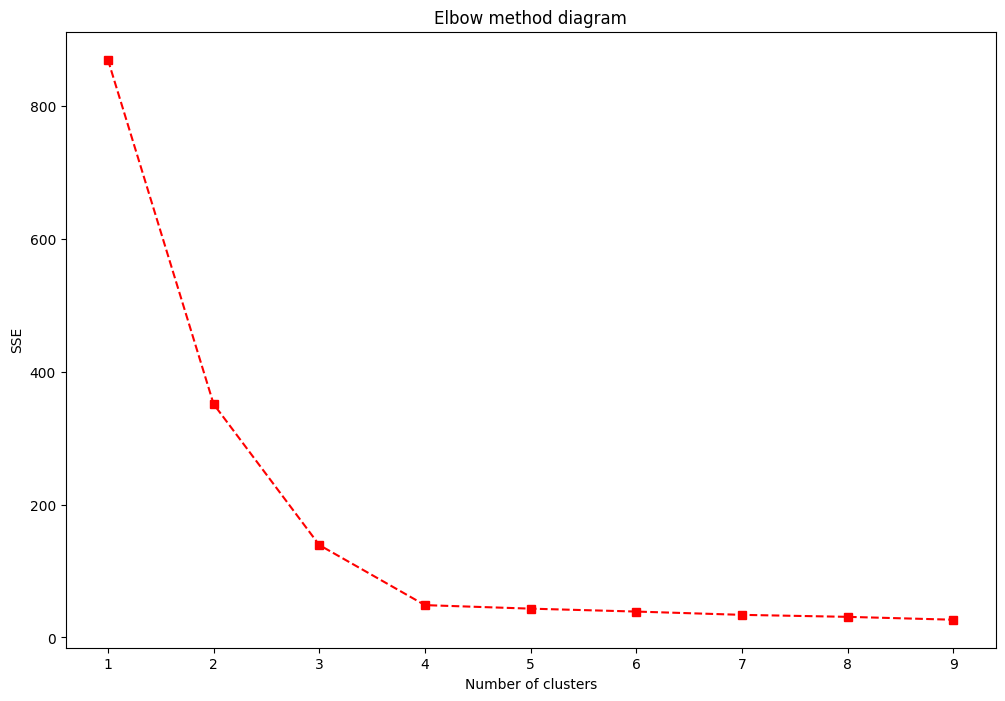

In [ ]:
elbow(X, n_clusters=10)

### Silhouette diagram implementation

In [ ]:
from matplotlib import cm

def silhouette(X, n_clusters):
  """
  Silhouette diagram function to determine the optimal number of clusters
  Parameters
  ----------
  X : The following forms of ndarray, shape (n_samples, n_features)
      Features of training data
  model : ScratchKMeans
      ScratchKMeans model
  n_clusters : int
      Number of clusters to evaluate
  """

  for k in range(2, n_clusters):
    model = ScratchKMeans(n_clusters=k, n_init=10, max_iter=100, tol=1e-05)
    model.fit(X)

    y_km = model.predict(X)
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]

    ab = np.zeros((X.shape[0], 2))
    for i in range(X.shape[0]):
      a = np.mean(np.linalg.norm(X[i] - X[y_km == y_km[i]], axis=1))
      b = min(
        np.mean(np.linalg.norm(X[i] - X[y_km == y], axis=1))
        for y in cluster_labels if y != y_km[i]
      )
      ab[i, 0] = a
      ab[i, 1] = b

    silhouette_vals = np.zeros(X.shape[0])
    silhouette_vals = (ab[:, 1] - ab[:, 0]) / np.maximum(ab[:, 0], ab[:, 1])
    silhouette_avg = np.mean(silhouette_vals)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient values')
    plt.title(f'Silhouette diagram for k={k}')
    plt.tight_layout()
    plt.show()

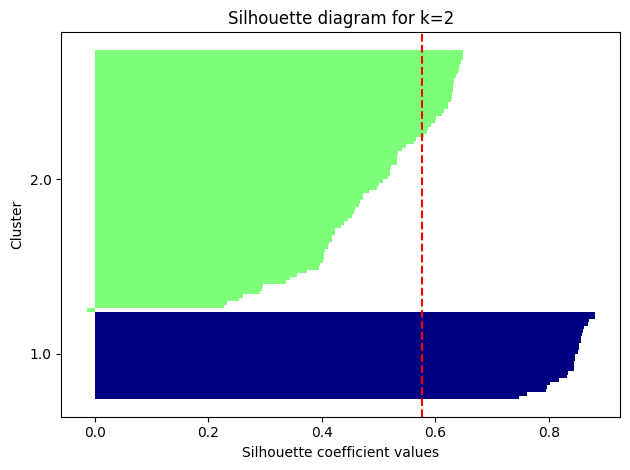

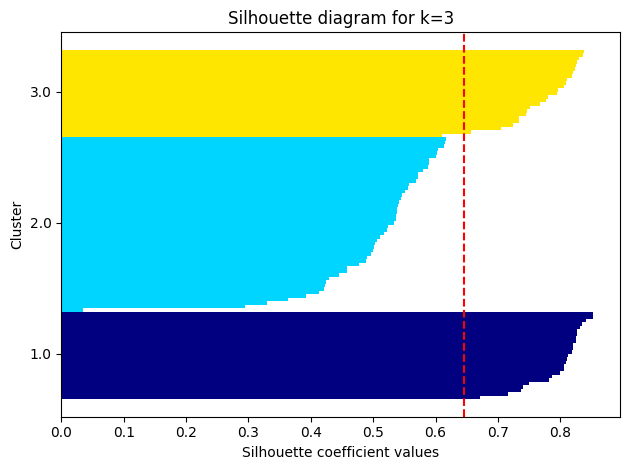

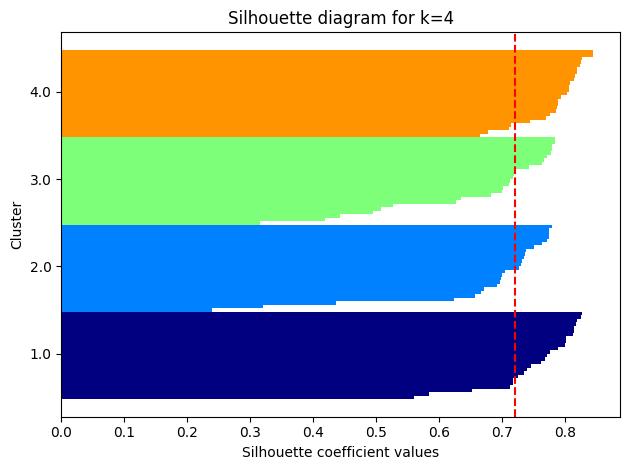

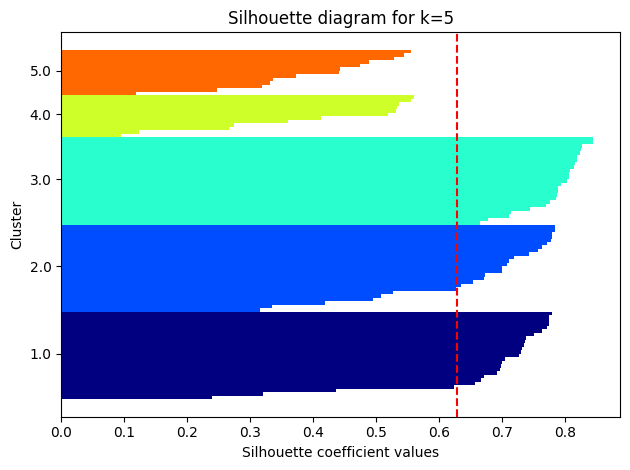

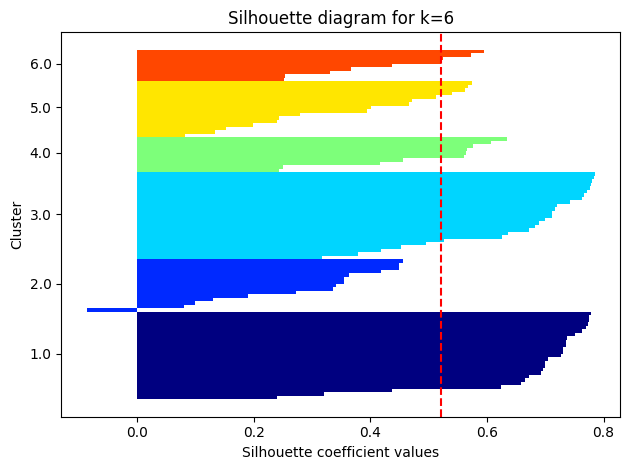

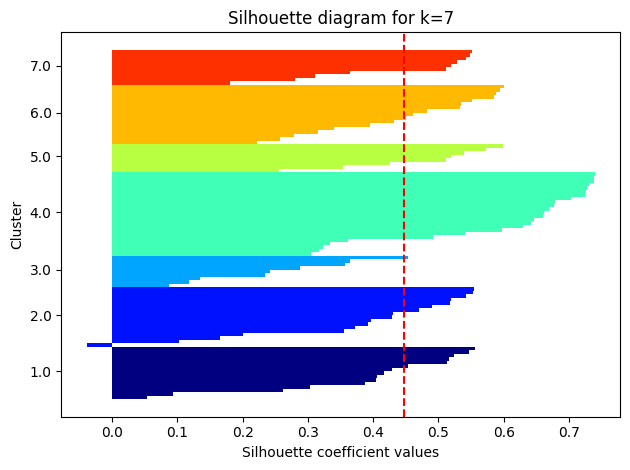

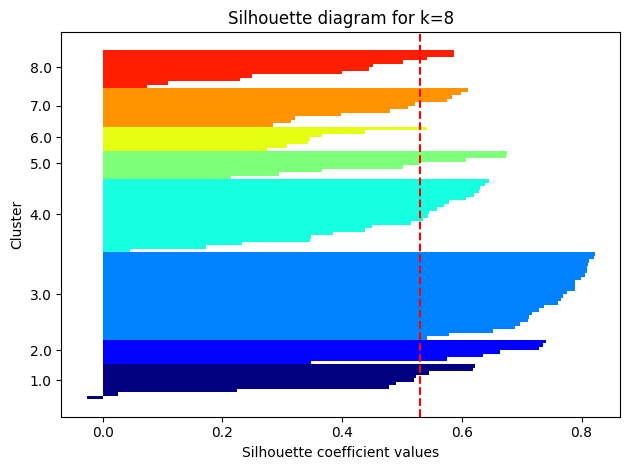

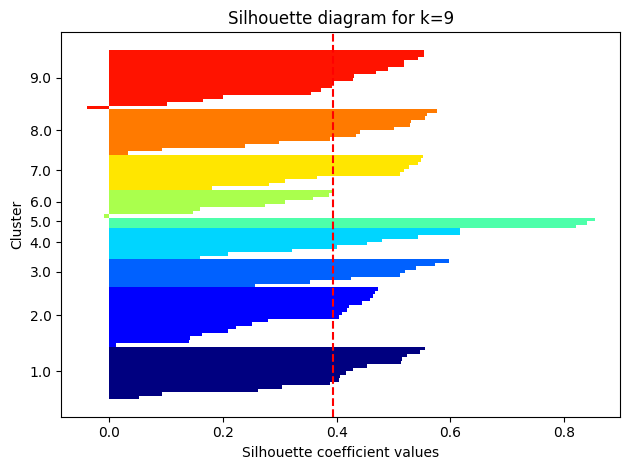

In [ ]:
silhouette(X, n_clusters=10)

## Cluster analysis

### Wholesaler data analysis

In [ ]:
# ucimlrepo package installation
!pip install ucimlrepo

In [ ]:
# dataset import
from ucimlrepo import fetch_ucirepo

# fetch dataset
wholesale_customers = fetch_ucirepo(id=292)

# data (as pandas dataframes)
X = wholesale_customers.data.features
y = wholesale_customers.data.targets

# metadata
print(wholesale_customers.metadata)

# variable information
print(wholesale_customers.variables)

{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

### Dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

X_set = X[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

n = 2
pca = PCA(n_components = 2)
pca = pca.fit(X_set)
X_pca = pca.transform(X_set)

[0.45961362 0.86478588]


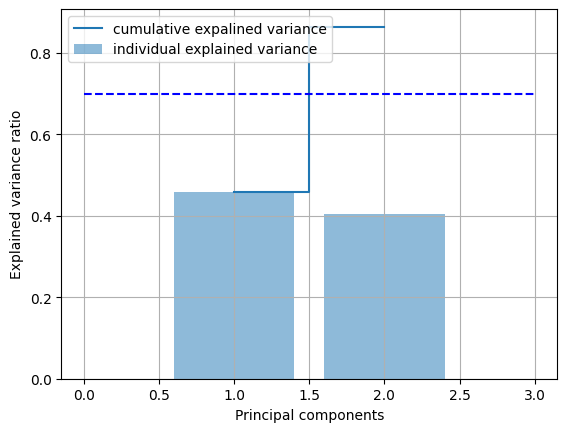

In [ ]:
# Displays the distributed explanation rate of PCA

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

plt.bar(range(1,n+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,n+1), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, n+1,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

### Selection of the number of clusters k

In [ ]:
model = ScratchKMeans(n_clusters=5, n_init=10, max_iter=100, tol=1e-05, verbose=True)
model.fit(X_pca)
model.best_sse

Initialize：0　Training times：0　Best SSE：208172694742.34503
Initialize：0　Training times：1　Best SSE：63848225768.99201
Initialize：0　Training times：2　Best SSE：53121151847.10084
Initialize：0　Training times：3　Best SSE：47717194929.54757
Initialize：0　Training times：4　Best SSE：43770853648.86947
Initialize：0　Training times：5　Best SSE：41796981793.18896
Initialize：0　Training times：6　Best SSE：40456130609.89503
Initialize：0　Training times：7　Best SSE：38369971441.014404
Initialize：0　Training times：8　Best SSE：36157177832.011955
Initialize：0　Training times：9　Best SSE：35084765765.17904
Initialize：0　Training times：10　Best SSE：34270162961.37356
Initialize：0　Training times：11　Best SSE：33278929899.716885
Initialize：0　Training times：12　Best SSE：33057269985.364872
Initialize：0　Training times：13　Best SSE：32928428859.527603
Initialize：0　Training times：14　Best SSE：32673899396.445904
Initialize：0　Training times：15　Best SSE：32547087879.83357
Initialize：0　Training times：16　Best SSE：32498054475.586277
Initialize：0　Tra

32044670443.780148

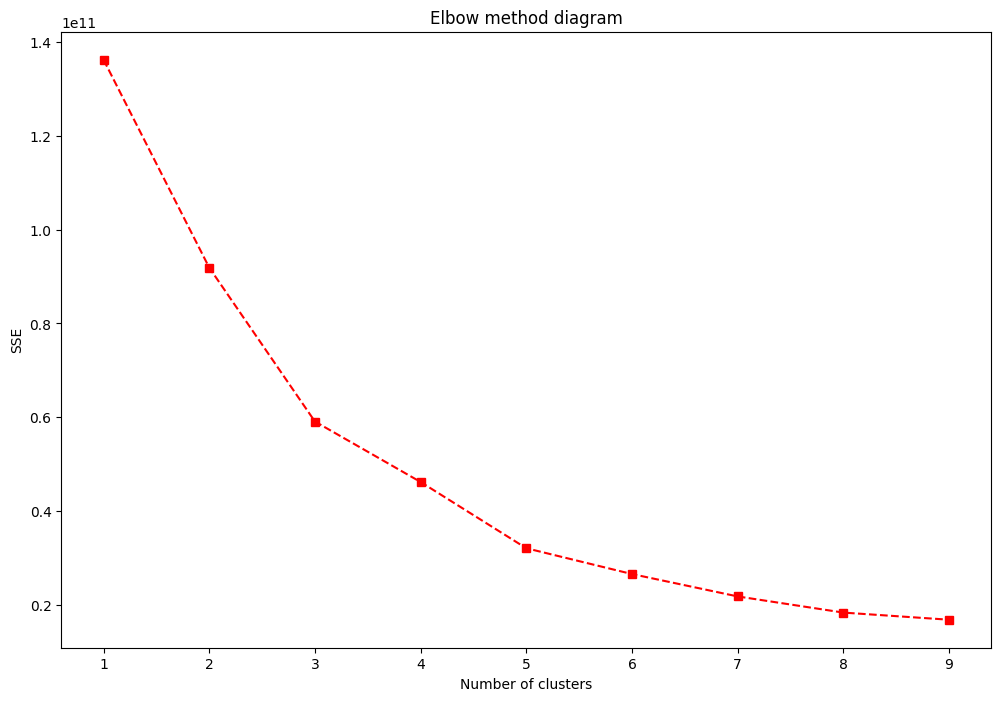

In [ ]:
elbow(X_pca, 10)

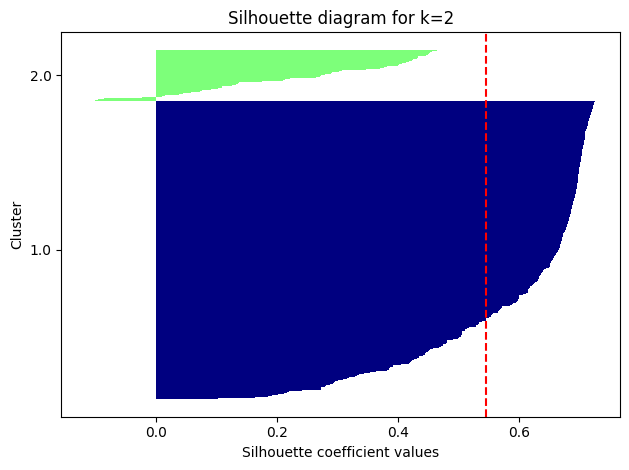

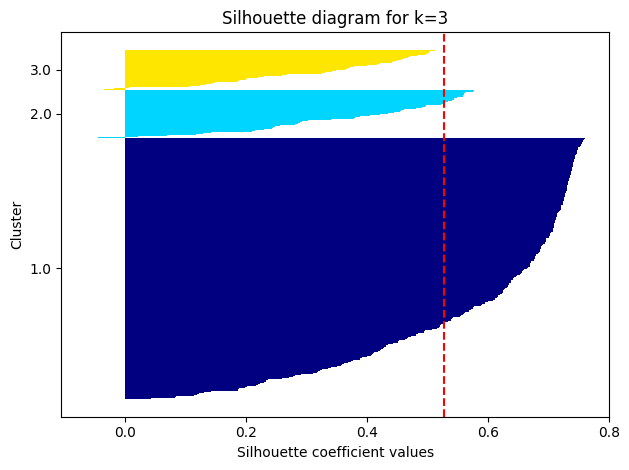

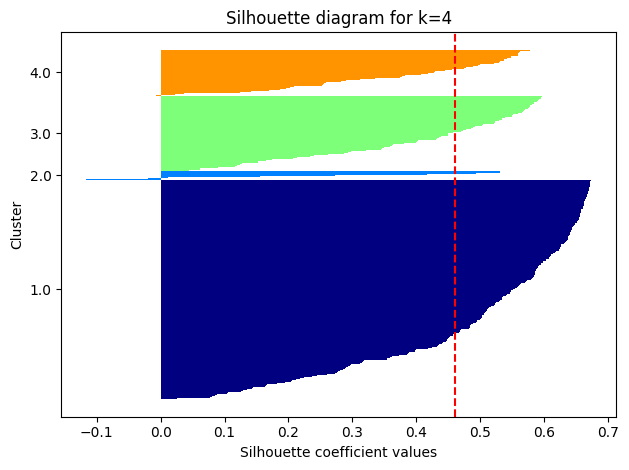

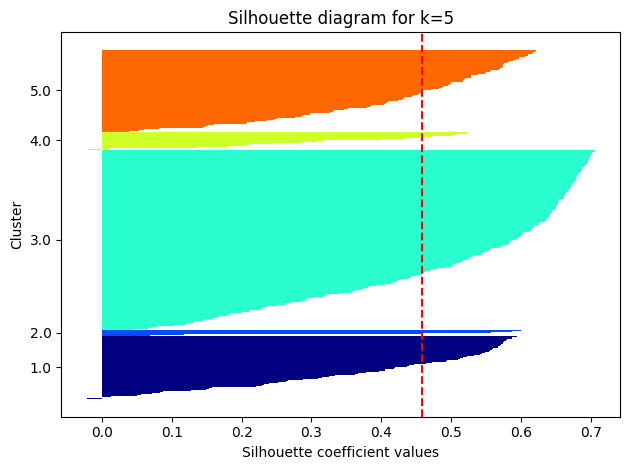

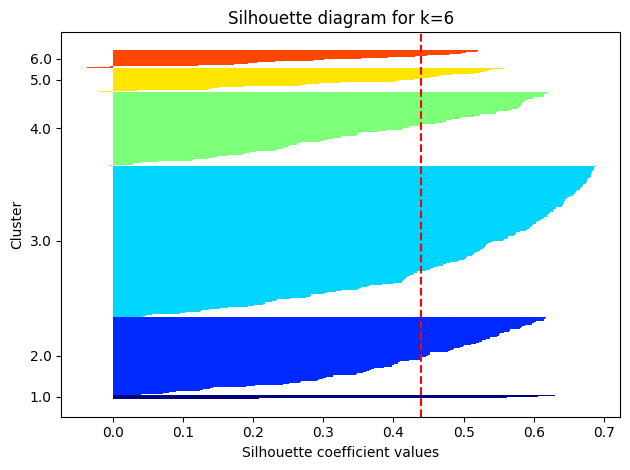

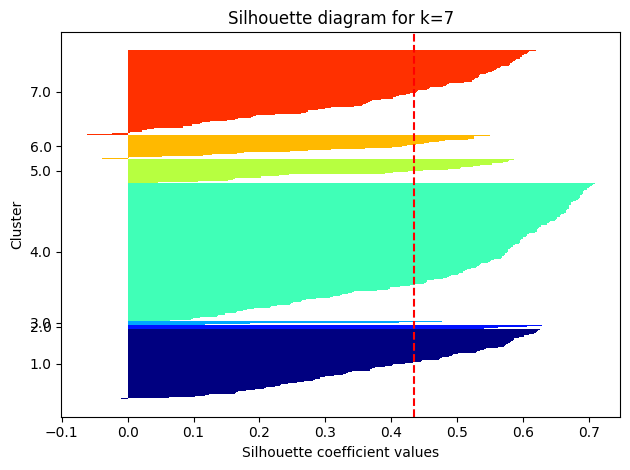

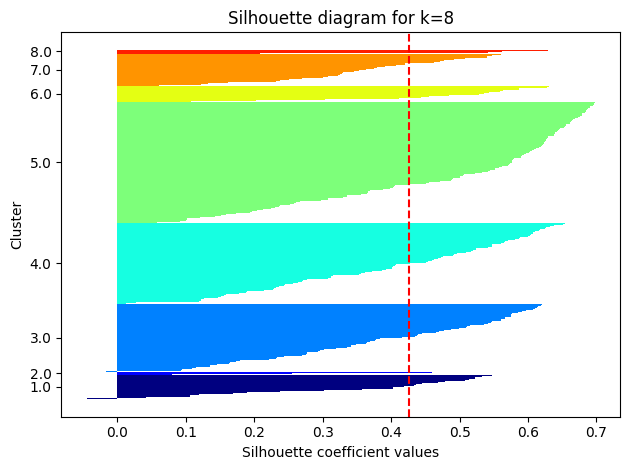

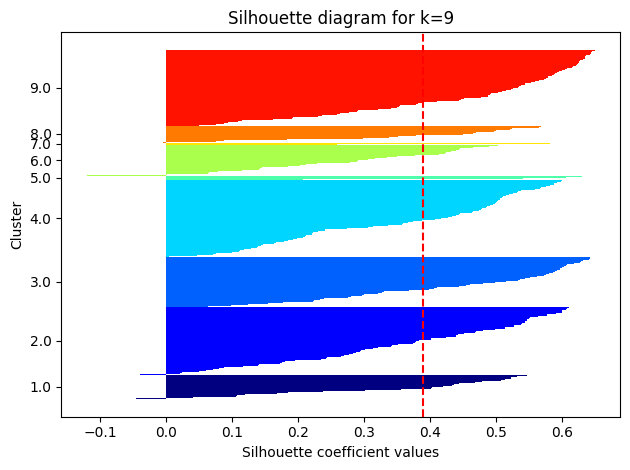

In [ ]:
silhouette(X_pca, 10)

As we can see it on the above diagrams, it is difficult to determine the optimal number of clusters using the elbow method.

However, we suppose the purpose of this analysis is to "analyze customer information, understand the characteristics of good customers and customers, and utilize the information for future policy development.

If we divide the data into too many clusters, we will not have enough manpower to develop useful measures, and if we divide the data into too few clusters, we will not be able to develop useful measures.

Moreover, considering the the silhouette diagram :
- a sub-optimal n_cluster will show the presence of clusters below the average silhouette score.
- a sub-optimal n_cluster will show wide fluctuation in the size of the silhouette plot.

Thus, our preferred n_cluster will be four, as it passes the two criteria.

Therefore, we decide to conduct the analysis with 4 clusters in this case.

### Comparison with known groups

In [ ]:
import pandas as pd

clf = ScratchKMeans(n_clusters=4, n_init=5, max_iter=100, tol=1e-5, verbose=False)
clf.fit(X.values)
pred = clf.predict(X.values)
summary_df = pd.DataFrame({'pred':pred,'Region':y.values.reshape(-1),'Channel':X['Channel'],})

#### Comparison with Region


In [ ]:
pd.pivot_table(summary_df, index='Region', columns='pred',values='Channel', aggfunc=len)

pred,0.0,1.0,2.0,3.0
Region,,,,
1,45,3,19,10
2,25,1,13,8
3,182,22,81,31


Considering this result, we can say that all regions are often classified as cluster 0 (pred 0.0), then as 2, after 3.0 and finally 1.0.

From this we can say that there are not differences in data trends among the different Regions.

#### Comparison with Channel

In [ ]:
pd.pivot_table(summary_df, index='Channel', columns='pred',values='Region', aggfunc=len)

pred,0.0,1.0,2.0,3.0
Channel,,,,
1,182,24,90,2
2,70,2,23,47


Considering the results, we can say that both `Channel==1` and `Channel==2` are classified more into cluster 0 but, for the classification in other clusters doesn't follow the same trend.

From this, we can say that there is a difference in the trend of data depending on the Channel.

### Useful information for wholesalers

In [ ]:
arr = np.concatenate([X, y, pred.reshape(-1,1)], axis=1)
data = pd.DataFrame(arr, columns=[*X.columns, *y.columns, 'Cluster'])
data.groupby(['Cluster']).agg(['mean'])

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
,mean,mean,mean,mean,mean,mean,mean,mean
Cluster,,,,,,,,
0.0,1.714286,42117.285714,46046.142857,42914.285714,10211.714286,17327.571429,12192.142857,3.000000
1.0,1.176895,8115.205776,3253.981949,4095.787004,2739.548736,1184.176895,1051.859206,2.541516
2.0,1.178082,31848.164384,4605.205479,5783.356164,5341.849315,1100.520548,1991.424658,2.561644
3.0,1.903614,4969.662651,11933.746988,19776.433735,1582.626506,8894.084337,1793.481928,2.493976


In [ ]:
arr = np.concatenate([X, y, pred.reshape(-1,1)], axis=1)
data = pd.DataFrame(arr, columns=[*X.columns, *y.columns, 'Cluster'])
data.groupby(['Channel', 'Region', 'Cluster']).agg(['mean'])

Fresh          Milk       Grocery  \
                                mean          mean          mean   
Channel Region Cluster                                             
1.0     1.0    1.0       8036.288889   3223.666667   3213.577778   
               2.0      32573.750000   4082.083333   5307.833333   
               3.0       4357.500000  17146.000000  14618.500000   
        2.0    1.0       8447.478261   1590.608696   3943.782609   
               2.0      26384.600000   5587.000000   6473.400000   
        3.0    0.0      74499.000000  36788.500000  19159.000000   
               1.0       7916.093750   2766.937500   3128.106250   
               2.0      34007.930233   3929.441860   4425.581395   
               3.0       8392.500000   8416.666667  15164.333333   
2.0     1.0    1.0       4707.500000   5087.500000   6840.000000   
               2.0      20782.000000   5921.000000   9212.000000   
               3.0       4152.923077  12910.846154  22763.307692   
        2.0    1.0       9765.500000   3688.166667   6845.500000   
               2.0      27082.000000   6817.000000  10790.000000   
               3.0       4402.583333  12139.916667  21528.083333   
        3.0    0.0      29164.600000  49749.200000  52416.400000   
               1.0       8922.794872   6013.205128   8468.846154   
               2.0      26536.636364   7050.545455  10529.272727   
               3.0       4931.860000  11843.780000  19339.220000   

                              Frozen Detergents_Paper    Delicassen  
                                mean             mean          mean  
Channel Region Cluster                                               
1.0     1.0    1.0       2480.511111       959.377778    838.933333  
               2.0       5113.333333       520.916667   2238.000000  
               3.0       5764.500000      3329.000000   3012.000000  
        2.0    1.0       3976.521739       467.130435    856.130435  
               2.0      13880.200000       554.400000   2254.800000  
        3.0    0.0      26639.500000      2593.500000  28246.500000  
               1.0       2965.900000       691.212500   1003.925000  
               2.0       5362.581395       621.139535   1816.790698  
               3.0       2198.666667      3916.666667   4185.833333  
2.0     1.0    1.0       4501.500000      2843.250000   1271.250000  
               2.0       1759.000000      2568.000000   1553.000000  
               3.0       2057.615385     10316.461538   2081.307692  
        2.0    1.0       2592.166667      3281.333333   1311.333333  
               2.0       1365.000000      4111.000000   2139.000000  
               3.0       1029.416667     11333.000000   1127.833333  
        3.0    0.0       3640.600000     23221.200000   5770.400000  
               1.0       1222.282051      3396.051282   1547.205128  
               2.0       2316.272727      3447.909091   2311.818182  
               3.0       1350.700000      8758.820000   1542.580000

Considering the above results, we can say the following:

- **Cluster 0** customers are characterized by high spending across all product categories, particularly in fresh produce, milk, grocery, and frozen items. This suggests that these customers are likely large-scale retailers or wholesalers who purchase a wide variety of products in bulk.

- **Cluster 1** customers exhibit lower spending overall, with the exception of fresh produce. This cluster may represent smaller retailers or individual consumers who primarily focus on purchasing fresh items.

- **Cluster 2** customers also demonstrate lower spending, but with a relatively higher emphasis on grocery and frozen products. This suggests that they may be households or small businesses that primarily purchase essential food items.

- **Cluster 3** customers show moderate spending across most product categories, with a particular focus on milk, grocery, followed by detergen. This cluster may represent convenience stores or smaller grocery stores that prioritize stocking essential items, along with a range of other products to meet the needs of their customers.

*Therefore, it is possible to consider that measures should be developed for each cluster of customers to encourage them to consume more of the items that they consume less of, respectively.*

## Other non-hierarchical clustering techniques

### (Advance assignment) Investigation of other methods

**DBSCAN** (**Density-Based Spatial Clustering of Applications with Noise**) is a non-hierarchical clustering method that groups data points based on density. It identifies clusters by finding areas with a high density of points, separating them from regions with low density (which are treated as noise or outliers).

**Advantages**:

- **No need to specify the number of clusters**: DBSCAN automatically detects the number of clusters, unlike k-means.
- **Ability to find clusters of arbitrary shapes**: Unlike k-means, which forms spherical clusters, DBSCAN can identify clusters of varying shapes and sizes.
- **Robust to outliers**: It effectively handles noise and outliers by classifying low-density points as noise.

**Disadvantages**:

- **Sensitive to parameters**: The results depend on the selection of `eps` (the radius around a point) and `minPts` (minimum number of points within `eps` to form a cluster).
- **Difficulty with varying densities**: DBSCAN struggles to identify clusters when they have very different densities.
- **Scalability issues**: It can be slow on large datasets, especially if the distance computation is expensive.

**t-SNE** (**t-Distributed Stochastic Neighbor Embedding**) is a dimensionality reduction method used to visualize high-dimensional data in 2D or 3D by preserving the local structure of the data, meaning points that are similar in high dimensions are placed close to each other in the low-dimensional representation.

**Advantages**:

- **Excellent for visualization**: t-SNE is widely used for visualizing complex, high-dimensional data in 2D or 3D.
- **Preserves local structure**: It maintains the local relationships between points, which helps to reveal clusters in the data.

**Disadvantages**:

- **Computationally expensive**: t-SNE can be slow, especially with large datasets.
- **Not ideal for large-scale data**: It struggles to handle very large datasets due to its high computational cost.
- **Global structure not preserved**: While it preserves local structures, the global structure of the data may be distorted.

**LLE** (**Locally Linear Embedding**) is a dimensionality reduction technique that attempts to preserve the distances between neighboring data points when mapping the data from high-dimensional to low-dimensional space.

**Advantages**:

- **Good for manifold learning**: LLE is effective for datasets that lie on a curved manifold within the higher-dimensional space.
- **Preserves local geometry**: It maintains the local relationships between points, similar to t-SNE, which helps in understanding the local structure of the data.

**Disadvantages**:

- **Sensitive to noise**: LLE can struggle when the data contains a lot of noise, as it relies on the local relationships between points.
- **Difficulty with disconnected regions**: It may fail if the data contains clusters that are not connected in the original space.
- **Limited interpretability**: Like t-SNE, the resulting low-dimensional representation is not necessarily easy to interpret, especially beyond visualization.

### (Advance assignment) Use of t-SNE and DBSCAN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

X_sne = TSNE(n_components=2, learning_rate='auto').fit_transform(X_set)
print('X_sne.shape:{}'.format(X_sne.shape))

db_scan = DBSCAN(eps = 3, min_samples=10).fit(X_sne)
print(np.unique(db_scan.labels_))

X_sne.shape:(440, 2)
[-1  0  1  2]


In [ ]:
np.unique(pred)

array([0., 1., 2., 3.])

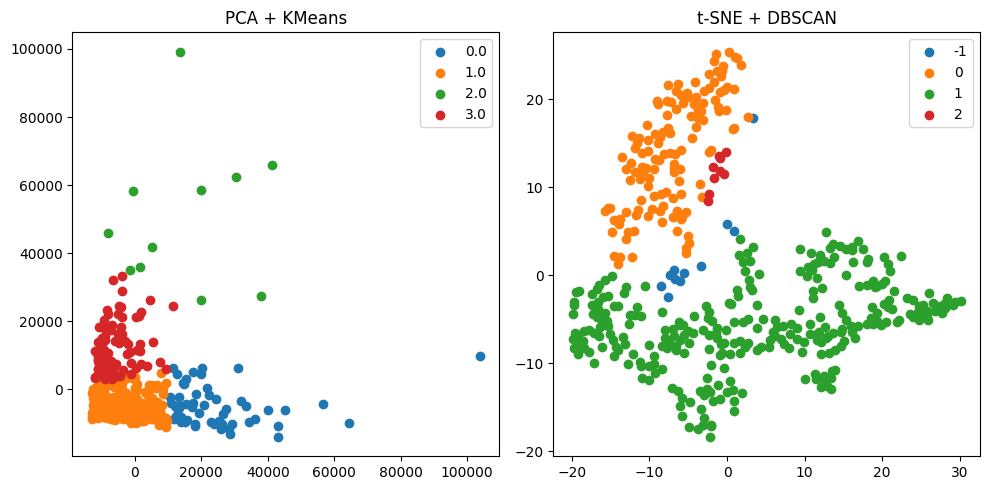

In [ ]:
# Let's compare the clustering result with the result of PCA + kmeans.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# PCA + Kmeans
plt.subplot(1, 2, 1)
pca_kmeans_labels = np.unique(pred)
for label in pca_kmeans_labels:
    plt.scatter(X_pca[pred == label, 0], X_pca[pred == label, 1])
plt.legend(pca_kmeans_labels)
plt.title('PCA + KMeans')

# t-SNE + DBSCAN
plt.subplot(1, 2, 2)
sne_dbscan_labels = np.unique(db_scan.labels_)
for label in sne_dbscan_labels:
    plt.scatter(X_sne[db_scan.labels_ == label, 0], X_sne[db_scan.labels_ == label, 1])
plt.legend(sne_dbscan_labels)
plt.title('t-SNE + DBSCAN')

plt.tight_layout()
plt.show()